In [ ]:
import tensorflow as tf
print("GPUs detectadas:", tf.config.list_physical_devices('GPU1'))

2025-12-11 16:21:40.435073: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 16:21:40.931485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 16:21:43.437268: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


GPUs detectadas: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("agrigorev/clothing-dataset-full")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 1.5 MB/s eta 0:00:00a 0:00:01


/home/justin/Documentos/APRENDIZAJE/Practica 3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 6.50G/6.50G [14:59<00:00, 7.76MB/s]  

Extracting files...


Path to dataset files: /home/justin/.cache/kagglehub/datasets/agrigorev/clothing-dataset-full/versions/1


In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

print(os.listdir(path))


['images_compressed', 'practica.ipynb', 'images.csv', 'images_original', 'venv', 'mlflow.db']


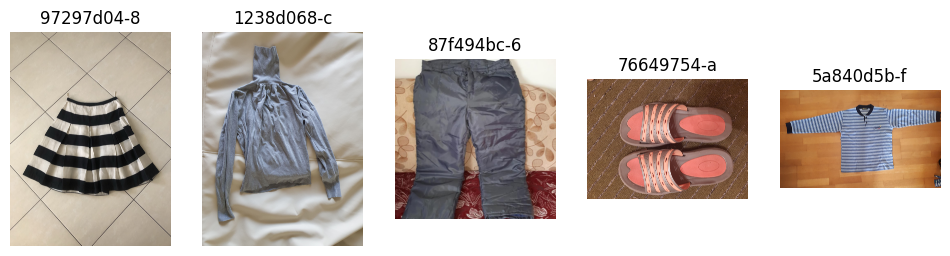

In [ ]:
if path is None:
    candidates_to_check = []
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)):
        candidates_to_check.extend(candidates)
    candidates_to_check.append('.')

    images_path = None
    for root in candidates_to_check:
        possible = [
            os.path.join(root, "images_original", "train"),
            os.path.join(root, "images_original"),
            os.path.join(root, "train"),
            root
        ]
        for p in possible:
            if p and os.path.exists(p) and os.path.isdir(p):
                if os.path.basename(p) == "images_original":
                    train_p = os.path.join(p, "train")
                    if os.path.exists(train_p) and os.path.isdir(train_p):
                        images_path = train_p
                        break
                images_path = p
                break
        if images_path:
            break

    if images_path is None:
        raise FileNotFoundError(
            "No se encontró la ruta del dataset. Establece la variable 'path' o descarga el dataset "
            "(por ejemplo: path = kagglehub.dataset_download(...))."
        )
else:
    images_path = os.path.join(path, "images_original", "train")
    if not os.path.exists(images_path):
        if os.path.exists(os.path.join(path, "images_original", "train")):
            images_path = os.path.join(path, "images_original", "train")
        elif os.path.exists(os.path.join(path, "images_original")):
            images_path = os.path.join(path, "images_original")
        elif os.path.exists(os.path.join(path, "train")):
            images_path = os.path.join(path, "train")
        elif os.path.isdir(path):
            images_path = path
        else:
            raise FileNotFoundError(f"No se encontró la carpeta de imágenes bajo path={path}")

image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))][:5]
if not image_files:
    raise FileNotFoundError(f"No se encontraron imágenes en {images_path}")

n = len(image_files)
plt.figure(figsize=(12, 4))

for i, img_name in enumerate(image_files):
    img_path = os.path.join(images_path, img_name)
    img = Image.open(img_path)

    plt.subplot(1, n, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name[:10])

plt.show()
